# Bollinger Bands and Pivot Points Bands

https://www.incrediblecharts.com/indicators/bollinger-band-width.php

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-09-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461624,109560400
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106266,133332000
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207157,137160000
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777874,150479200
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069561,158066000


In [3]:
# Calculate Moving Average and Standard Deviation
n = 20

# Calculate Pivot Points
df['Pivot Point'] = (df['High'] + df['Low'] + df['Close']) / 3

# Calculate Pivot Points Bands (Simple Moving Average of Pivot Points)
df['Pivot Points Bands'] = df['Pivot Point'].rolling(window=n).mean()

df['SMA'] = df['Adj Close'].rolling(n).mean()
df['STD'] = df['Adj Close'].rolling(n).std()

# Calculate Bollinger Bands
df['Upper Bollinger Band'] = df['SMA'] + 2 * df['STD']
df['Lower Bollinger Band'] = df['SMA'] - 2 * df['STD']

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Pivot Point,Pivot Points Bands,SMA,STD,Upper Bollinger Band,Lower Bollinger Band
Date,,,,,,,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461624,109560400,57.014167,NaN,NaN,NaN,NaN,NaN
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106266,133332000,56.803333,NaN,NaN,NaN,NaN,NaN
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207157,137160000,55.979168,NaN,NaN,NaN,NaN,NaN
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777874,150479200,55.615000,NaN,NaN,NaN,NaN,NaN
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069561,158066000,54.720834,NaN,NaN,NaN,NaN,NaN


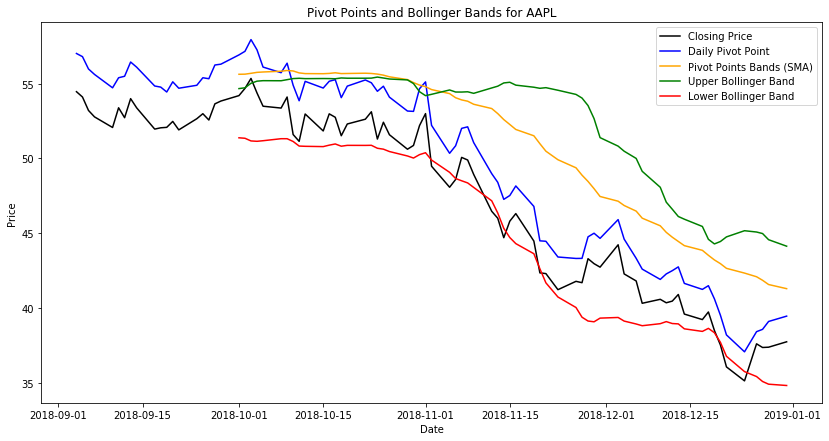

In [5]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Adj Close'], label='Closing Price', color='black')
plt.plot(df['Pivot Point'], label='Daily Pivot Point', color='blue')
plt.plot(df['Pivot Points Bands'], label='Pivot Points Bands (SMA)', color='orange')
plt.plot(df['Upper Bollinger Band'], label='Upper Bollinger Band', color='green')
plt.plot(df['Lower Bollinger Band'], label='Lower Bollinger Band', color='red')
plt.title(f'Pivot Points and Bollinger Bands for {symbol}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Candlestick with Bollinger Bands and Pivot Points Bands

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Pivot Point,Pivot Points Bands,SMA,STD,Upper Bollinger Band,Lower Bollinger Band,VolumePositive
0,736941.0,57.102501,57.294998,56.657501,57.090000,54.461624,109560400,57.014167,NaN,NaN,NaN,NaN,NaN,False
1,736942.0,57.247501,57.417500,56.275002,56.717499,54.106266,133332000,56.803333,NaN,NaN,NaN,NaN,NaN,False
2,736943.0,56.557499,56.837502,55.325001,55.775002,53.207157,137160000,55.979168,NaN,NaN,NaN,NaN,NaN,False
3,736944.0,55.462502,56.342499,55.177502,55.325001,52.777874,150479200,55.615000,NaN,NaN,NaN,NaN,NaN,False
4,736947.0,55.237499,55.462502,54.117500,54.582500,52.069561,158066000,54.720834,NaN,NaN,NaN,NaN,NaN,False


Text(0.5, 0, 'Date')

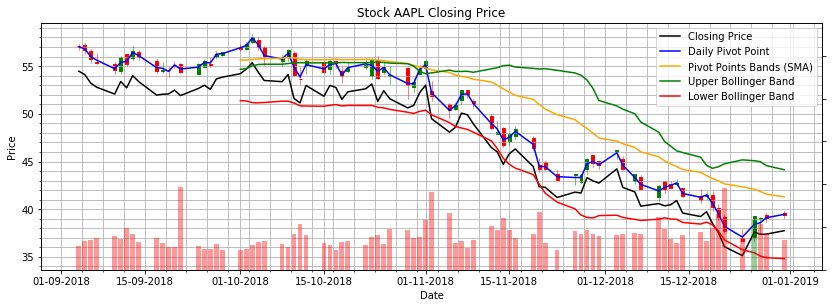

In [7]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['Adj Close'], label='Closing Price', color='black')
ax1.plot(df['Pivot Point'], label='Daily Pivot Point', color='blue')
ax1.plot(df['Pivot Points Bands'], label='Pivot Points Bands (SMA)', color='orange')
ax1.plot(df['Upper Bollinger Band'], label='Upper Bollinger Band', color='green')
ax1.plot(df['Lower Bollinger Band'], label='Lower Bollinger Band', color='red')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.legend(loc='best')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

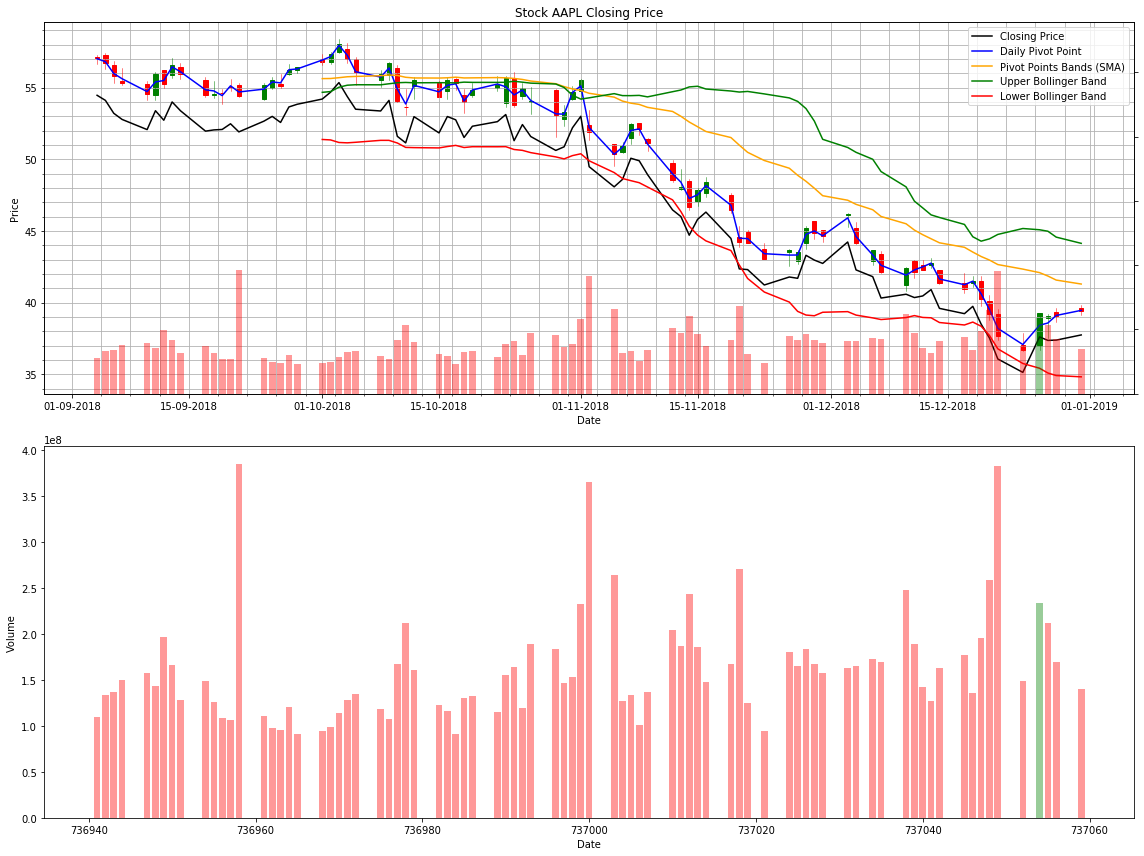

In [8]:
fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['Adj Close'], label='Closing Price', color='black')
ax1.plot(df['Pivot Point'], label='Daily Pivot Point', color='blue')
ax1.plot(df['Pivot Points Bands'], label='Pivot Points Bands (SMA)', color='orange')
ax1.plot(df['Upper Bollinger Band'], label='Upper Bollinger Band', color='green')
ax1.plot(df['Lower Bollinger Band'], label='Lower Bollinger Band', color='red')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.legend(loc='best')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

# Second subplot with Volume
ax2 = plt.subplot(2, 1, 2)
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax2.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
plt.tight_layout()
plt.show()